In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Coffee.csv'  
data = pd.read_csv(file_path)


print(data.columns)


Index(['Area Code', 'Date', 'Market', 'Market Size', 'Product', 'Product Line',
       'Product Type', 'State', 'Type', 'Budget COGS', 'Budget Margin',
       'Budget Profit', 'Budget Sales', 'COGS', 'Inventory', 'Margin',
       'Marketing', 'Profit', 'Sales', 'Total Expenses'],
      dtype='object')


In [42]:
# 1. Which State has the highest sales?
highest_sales_state = data.groupby('State')['Sales'].sum().idxmax()
print(f'Which State has the highest sales: {highest_sales_state}')

# 2. Top 3 states that have the highest profit
top_profit_states = data.groupby('State')['Profit'].sum().nlargest(3)
print('Top 3 states that have the highest profit:')
print(top_profit_states)


Which State has the highest sales: California
Top 3 states that have the highest profit:
State
California    31785
Illinois      30821
Iowa          22212
Name: Profit, dtype: int64


We also see the top 3 profits
California    31785
Illinois      30821
Iowa          22212
It differs from the top 3 sellers, which we will explain later in the following steps 

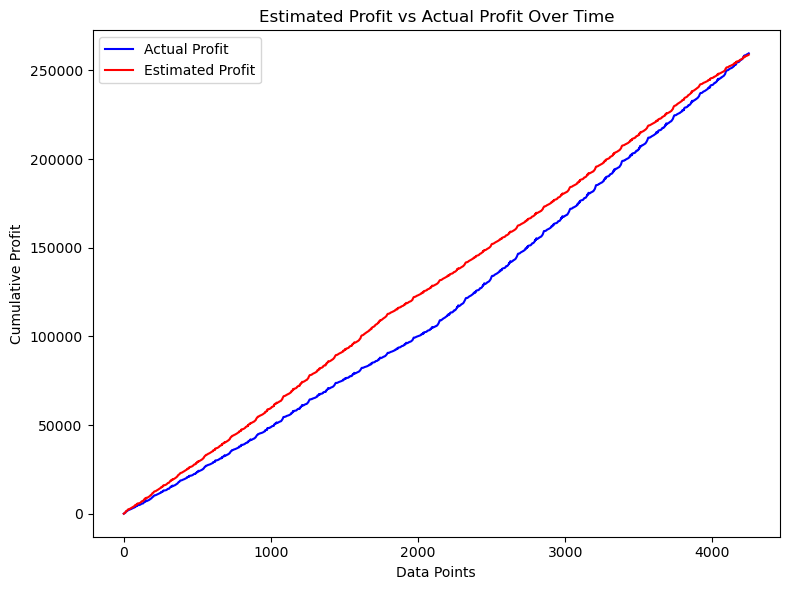

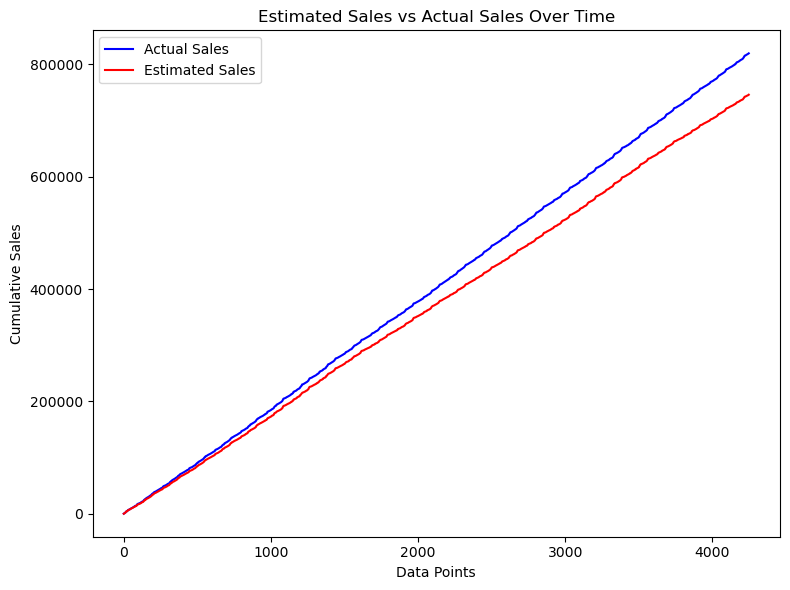

Sales Performance: 109.87%
Profit Performance: 100.30%


In [33]:
# 3. Did the estimated Profit and Sales match the Actual Profit and Sales?

data['Cumulative Actual Profit'] = data['Profit'].cumsum()
data['Cumulative Estimated Profit'] = data['Budget Profit'].cumsum()
data['Cumulative Actual Sales'] = data['Sales'].cumsum()
data['Cumulative Estimated Sales'] = data['Budget Sales'].cumsum()

plt.figure(figsize=(8, 6))
sns.lineplot(data=data, x=data.index, y='Cumulative Actual Profit', label='Actual Profit', color='blue')
sns.lineplot(data=data, x=data.index, y='Cumulative Estimated Profit', label='Estimated Profit', color='red')
plt.title('Estimated Profit vs Actual Profit Over Time')
plt.xlabel('Data Points')
plt.ylabel('Cumulative Profit')
plt.legend(loc='upper left') 
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.lineplot(data=data, x=data.index, y='Cumulative Actual Sales', label='Actual Sales', color='blue')
sns.lineplot(data=data, x=data.index, y='Cumulative Estimated Sales', label='Estimated Sales', color='red')
plt.title('Estimated Sales vs Actual Sales Over Time')
plt.xlabel('Data Points')
plt.ylabel('Cumulative Sales')
plt.legend(loc='upper left')  
plt.tight_layout()
plt.show()

#KPIs 
actual_sales_total = data['Sales'].sum()
budget_sales_total = data['Budget Sales'].sum()
actual_profit_total = data['Profit'].sum()
budget_profit_total = data['Budget Profit'].sum()

sales_performance = actual_sales_total / budget_sales_total
profit_performance = actual_profit_total / budget_profit_total

print(f'Sales Performance: {sales_performance:.2%}')
print(f'Profit Performance: {profit_performance:.2%}')



 Did the estimated Profit and Sales match the Actual Profit and Sales?  The answer is definitely no. As the graph shows, the estimated profits are less than the actual profits, unlike the estimated sales, which are less than the actual sales. This shows that there is a flaw in planning, as there may be unnecessary costs that cause a reduction in profits, which may cause in the future to achieve losses instead of achieving profits.  
    I think that there are unnecessary operational costs. Either there are a higher number of workers than needed, or perhaps the number of our factories is higher than needed. We achieve excellent sales, but profits are less than sales. This is evidence of the presence of unnecessary costs, and they may actually cause losses in profits in the future.

In [15]:
data['Budget Sales'].sum()
actual_profit_total = data['Profit'].sum()
budget_profit_total = data['Budget Profit'].sum()

sales_performance = actual_sales_total / budget_sales_total
profit_performance = actual_profit_total / budget_profit_total

print(f'Sales Performance: {sales_performance:.2%}')
print(f'Profit Performance: {profit_performance:.2%}')


Sales Performance: 109.87%
Profit Performance: 100.30%


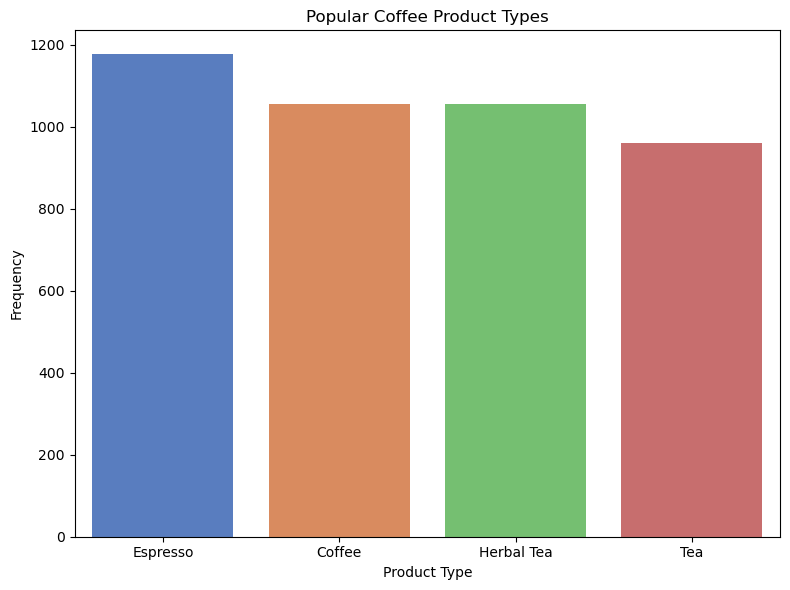

In [43]:
# 4. Popular Product Coffee Variety
popular_coffee_types = data['Product Type'].value_counts().nlargest(4)
plt.figure(figsize=(8, 6))
sns.barplot(x=popular_coffee_types.index, y=popular_coffee_types.values, palette='muted')
plt.title('Popular Coffee Product Types')
plt.xlabel('Product Type')
plt.ylabel('Frequency')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A graphical representation of a comparison between Popular Product Coffee Variety

In [39]:
popular_product_variety = data['Product'].value_counts().idxmax()
print(f'Popular Product Coffee Variety: {popular_product_variety}')

Popular Product Coffee Variety: Colombian


The most famous coffee product is Colombian coffee


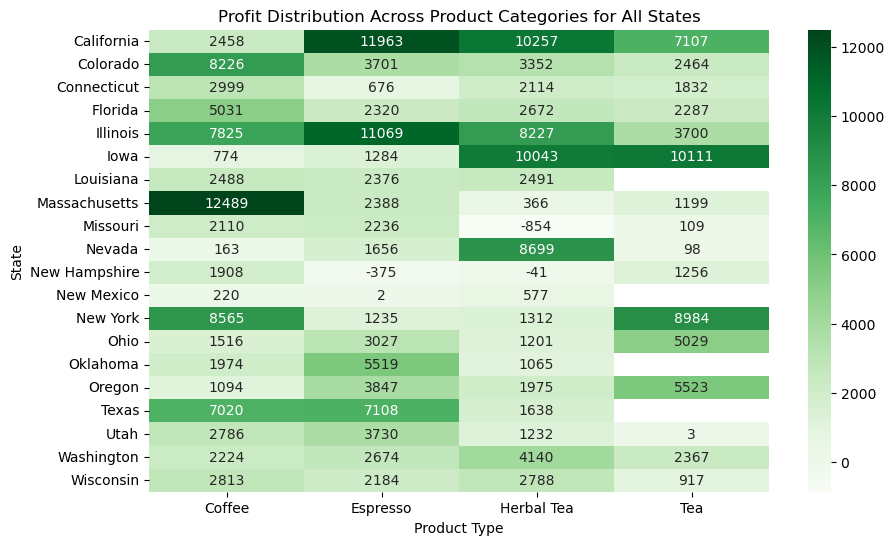

In [17]:
# 5. Profit distribution across product categories for all regions
profit_by_product_type = data.groupby(['State', 'Product Type'])['Profit'].sum().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(profit_by_product_type, cmap='Greens', annot=True, fmt='.0f')
plt.title('Profit Distribution Across Product Categories for All States')
plt.xlabel('Product Type')
plt.ylabel('State')
#plt.xticks(rotation=45)
plt.show()

The distribution of profits across product categories for all regions shows the highest states except for sales with the number of sales per cup of type, as the three types are close in number and tea to a lesser degree, but coffee achieved a much lower number than the rest of the types. This matter was repeated at Onions as well. I see that the presence of excellent numbers for three types and one that achieves a much lower score in the same state has nothing to do with the abundance of advertisements. I think that the product is presented to a bad degree, perhaps it is not prepared in the correct way or it is transported and stored in a bad way, which is also the case. What may be considered (excessive costs) is a reduction in profit despite an increase in sales.

In [29]:
# KPIs
actual_sales_total = data['Sales'].sum()
budget_sales_total = data['Budget Sales'].sum()
actual_profit_total = data['Profit'].sum()
budget_profit_total = data['Budget Profit'].sum()
sales_performance = actual_sales_total / budget_sales_total
profit_performance = actual_profit_total / budget_profit_total

print(f'Sales Performance: {sales_performance:.2%}')
print(f'Profit Performance: {profit_performance:.2%}')

Sales Performance: 109.87%
Profit Performance: 100.30%


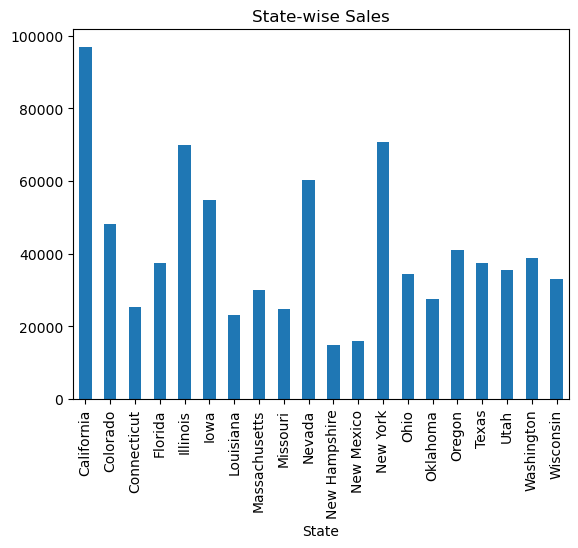

In [38]:
#States sales
state_sales = data.groupby('State')['Sales'].sum()

state_sales.plot(kind='bar')
plt.title('State-wise Sales')
plt.show()


Iowa = 3.2 million 
Illinois = 12.5 million
California = 39 million

In [44]:
# 2. Top 3 states that have the highest profit
top_profit_states = data.groupby('State')['Profit'].sum().nlargest(3)
print('Top 3 states that have the highest profit:')
print(top_profit_states)

Top 3 states that have the highest profit:
State
California    31785
Illinois      30821
Iowa          22212
Name: Profit, dtype: int64


In [53]:
total_population = 39538223  # Total population of California in 2023
profit = 31785  # Profit

profit_to_population_ratio = profit / total_population

print(f"Profit to population ratio (%): {profit_to_population_ratio:.4%}")

Profit to population ratio (%): 0.0804%


In [55]:
total_population = 12671821  # Total population of Illinois in 2023profit = 30821  # Profit

profit_to_population_ratio = profit / total_population

print(f"Profit to population ratio (%): {profit_to_population_ratio:.4%}")

Profit to population ratio (%): 0.2432%


In [57]:
total_population = 3190369  # Total population of Iowa in 2023 profit = 22212  # Profit

profit_to_population_ratio = profit / total_population

print(f"Profit to population ratio (%): {profit_to_population_ratio:.4%}")

Profit to population ratio (%): 0.6962%


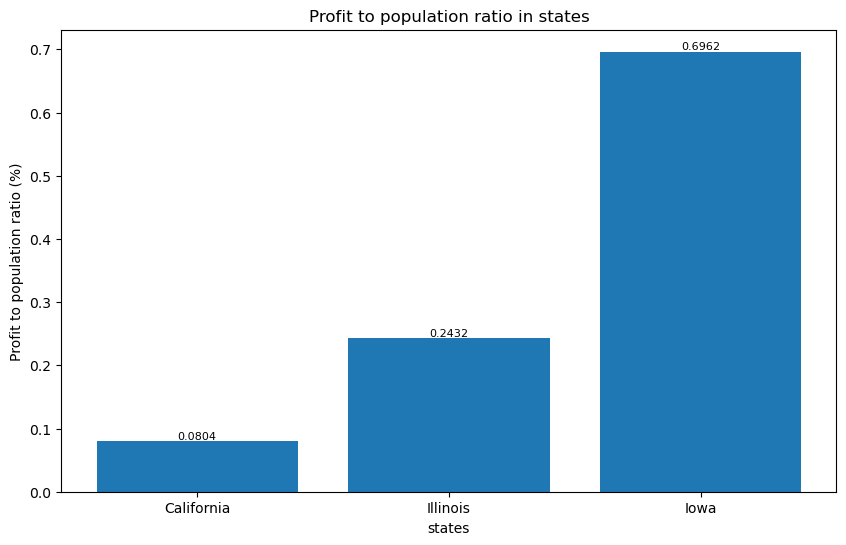

In [4]:
states = ['California', 'Illinois', 'Iowa']
profits = [31785, 30821, 22212]
populations = [39538223, 12671821, 3190369]
profit_to_population_ratios = [0.0804, 0.2432, 0.6962]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(states, profit_to_population_ratios)

ax.set_title('Profit to population ratio in states')
ax.set_xlabel('states')
ax.set_ylabel('Profit to population ratio (%)')

for i, v in enumerate(profit_to_population_ratios):
    ax.text(i, v, f"{v:.4f}", ha='center', va='bottom', fontsize=8)

plt.show()

Through these numbers, in addition to the number of coffee profits in California, it is clear to me that there are excessive costs in California that must be reduced and a new marketing plan developed to exploit the population density in the region.
While reducing unnecessary costs, such as increasing the number of factories or increasing the number of employees, without harming the quality of the coffee . 

Through all of the above, several things become clear to us. Firstly, the number of achieved sales is higher than the expected sales, in contrast to the profits. We achieve profits, but they are less than expected. 
From what became clear to us in the sales of each state, there are species that enjoy high profits and species that are much lower than the rest of the species in the same state. 
This may be due to excessive costs that are completely unnecessary. It is necessary to verify the number of branches and conduct another analysis of the sales of each branch, because it becomes clear that there are branches that do not achieve profits. This may be due to the fact that their preparation of coffee is not at the required level or that the locations of these branches are not appropriate. 

It is clear to us that there is a loophole and lack of exploitation in the state of California, as it has a high population but a lower percentage of profits than other states. The population density must be exploited, as well as costs reduced and perhaps some branches closed.
